# Final Project
## Source: "Suicide Rates Overview 1985 to 2016", Kaggle

My favorite artist from my adolescence, Korean singer/songwriter Kim Jonghyun, passed away in December 2017. The cause of death was suicide. He was 27 years of age.

Jonghyun's passing was a devastating shock to countless people, myself included, so I wanted to learn more about the subject of depression - and, more specifically, suicide. Looking at such heavy content can be very difficult, but it's critical that we still do so. By identifying causative trends, we can figure out how to prevent some such tragedies from taking place.

Because of this, I chose to analyze the Kaggle dataset titled "Suicide Rates Overview 1985 to 2016" for my final Data Science 1.1 project.

### Let's start off by importing what we need to analyze the data. I'll reuse what I imported in the NPS Project, as it matches what we have been using in class all term.

In [6]:
from scipy import stats
import math
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)}) #standardize sizing for seaborn plots

In [3]:
df = pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Let's select just a few columns of data to look at: country, year, sex, age, and suicides/100k pop (number of suicides per 100,000 individuals in a population).

This is ***not to say*** that the data in the other columns is not valuable. For phenomena with multiple potential causes, it can be useful to isolate each potential cause and examine it in depth so as to fully understand it. In my analysis, I will look at the impact of the most basic demographic information (country, year, sex, and age) on the number of suicides per 100,000 individuals.

### I'll use .drop to remove all other columns, and then .head to show the first five rows of this altered dataset:

In [4]:
df = df.drop(columns=['suicides_no', 'population', 'country-year', 'HDI for year', 'generation', ' gdp_for_year ($) ', 'gdp_per_capita ($)'])
df.head()

,country,year,sex,age,suicides/100k pop
0,Albania,1987,male,15-24 years,6.71
1,Albania,1987,male,35-54 years,5.19
2,Albania,1987,female,15-24 years,4.83
3,Albania,1987,male,75+ years,4.59
4,Albania,1987,male,25-34 years,3.28


Now that we have just the data that we want, time to start asking questions!

# Question #1: How does the suicide rate differ between the sexes?

To answer this, we need to first create two separate dataframes: One with the male data and one with the female data.

## Dataframe with only males:

In [24]:
males = df[(df['sex'] == 'male')]
males.head()

,country,year,sex,age,suicides/100k pop
0,Albania,1987,male,15-24 years,6.71
1,Albania,1987,male,35-54 years,5.19
3,Albania,1987,male,75+ years,4.59
4,Albania,1987,male,25-34 years,3.28
8,Albania,1987,male,55-74 years,0.73


Let's get an average of suicides/100k pop for men. We can use .describe to accomplish this:

In [25]:
males.describe()

,year,suicides/100k pop
count,13910.000000,13910.000000
mean,2001.258375,20.239329
std,8.469207,23.552754
min,1985.000000,0.000000
25%,1995.000000,2.422500
50%,2002.000000,13.550000
75%,2008.000000,27.360000
max,2016.000000,224.970000


This tells us that the average number of suicides/100k pop for males is ~20.24.

## Dataframe with only females:

In [26]:
females = df[(df['sex'] == 'female')]
females.head()

,country,year,sex,age,suicides/100k pop
2,Albania,1987,female,15-24 years,4.83
5,Albania,1987,female,75+ years,2.81
6,Albania,1987,female,35-54 years,2.15
7,Albania,1987,female,25-34 years,1.56
9,Albania,1987,female,5-14 years,0.00


Again, let's use .describe to get the average number of suicides per 100,000 individuals:

In [27]:
females.describe()

,year,suicides/100k pop
count,13910.000000,13910.000000
mean,2001.258375,5.392866
std,8.469207,7.358993
min,1985.000000,0.000000
25%,1995.000000,0.410000
50%,2002.000000,3.160000
75%,2008.000000,7.410000
max,2016.000000,133.420000


This tells us that the average number of suicides/100k pop for females is ~5.39. **The average number of suicides per 100,000 individuals is much higher in men than it is in women.**

### Next, I'll take these two averages, and I'll visualize them using a barplot to demonstrate the sex difference.

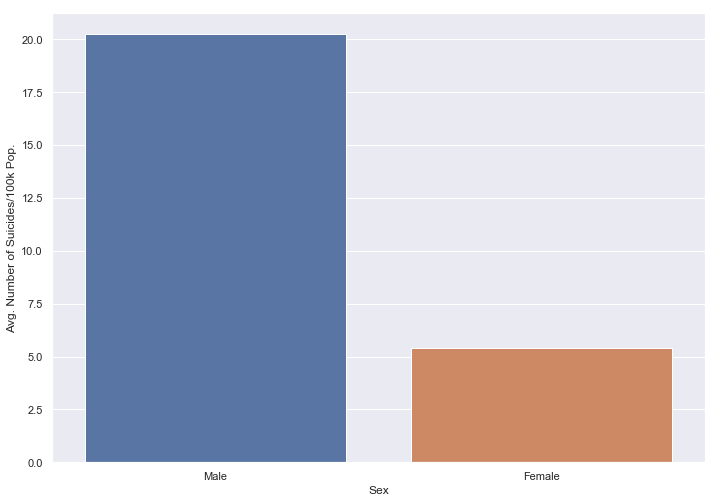

In [28]:
avgs = {'Avg. Number of Suicides/100k Pop.': [20.24, 5.39], 'Sex': ['Male', 'Female']}
sex_diff = pd.DataFrame(avgs, columns=['Avg. Number of Suicides/100k Pop.', 'Sex']);
sns.barplot(x='Sex', y='Avg. Number of Suicides/100k Pop.', data=sex_diff)

It's one thing to know that there's a difference and another thing to actually see it like this, isn't it?

# Answer #1: The suicide rate is higher globally for men than it is for women. From the years 1985-2016, an average of 20.24 out of 100,000 men and an average of 5.39 out of 100,000 women commit suicide.

The stark difference in the suicide rate between the sexes may seem surprising. Western popular culture suggests women are more emotionally affected than men are, and the logical conclusion to this suggestion is that women are likely to commit suicide at a higher rate. The reality of the situation subverts that.

**Further investigation into this question could include:**

* Ascertaining the causes of this difference, whether they be biological, sociological, etc.
* Adding data on suicide *attempts* to datasets such as these.
* Might men possibly have more access to more effective suicide methods? Might women possibly be more used to turning to their friends and family when they feel down than men are? Is it possible men are more likely to enact and follow plans to end their lives because men are socially conditioned to be more assertive? The possibilities are endless.

Because the United States of America is home to me, and because it's also where Make School is located, I'm curious to see the differences between the United States and the rest of the world.

This brings us to our next question....

# Question #2: How does the suicide rate differ between the United States and the rest of the countries in the dataset?

Let's take the same approach we took in Question #1: That is, it's time to make two dataframes. One for the USA, and one for the rest of the world.

## Dataframe with only the United States:

In [34]:
usa_df = df[(df['country'] == 'United States')]
usa_df.head()

,country,year,sex,age,suicides/100k pop
26848,United States,1985,male,75+ years,53.57
26849,United States,1985,male,55-74 years,29.50
26850,United States,1985,male,25-34 years,24.46
26851,United States,1985,male,35-54 years,22.77
26852,United States,1985,male,15-24 years,21.38


Let's get the average suicide rate using .describe again.

In [49]:
usa_df.describe()

,year,suicides/100k pop
count,372.000000,372.000000
mean,2000.000000,13.819812
std,8.956318,13.229875
min,1985.000000,0.260000
25%,1992.000000,3.972500
50%,2000.000000,6.890000
75%,2008.000000,23.305000
max,2015.000000,58.950000


For Americans, the average suicide rate is ~13.82 per 100,000 individuals.

## Dataframe for the rest of the countries:

In [44]:
restOf = df[df.country != 'United States']
restOf.head()

,country,year,sex,age,suicides/100k pop
0,Albania,1987,male,15-24 years,6.71
1,Albania,1987,male,35-54 years,5.19
2,Albania,1987,female,15-24 years,4.83
3,Albania,1987,male,75+ years,4.59
4,Albania,1987,male,25-34 years,3.28


In [45]:
restOf.describe()

,year,suicides/100k pop
count,27448.000000,27448.000000
mean,2001.275430,12.802494
std,8.461146,19.027143
min,1985.000000,0.000000
25%,1995.000000,0.900000
50%,2002.000000,5.960000
75%,2008.000000,16.450000
max,2016.000000,224.970000


For non-American nations, the average suicide rate is ~12.80 per 100,000 individuals.

### 12.80 isn't that far off from 13.82. Let's visualize it to help us understand it clearly!

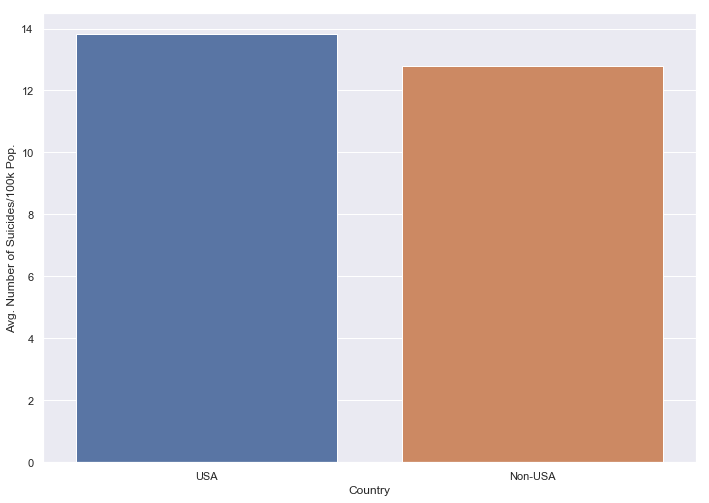

In [50]:
avgs2 = {'Avg. Number of Suicides/100k Pop.': [13.82, 12.80], 'Country': ['USA', 'Non-USA']}
nat_diff = pd.DataFrame(avgs2, columns=['Avg. Number of Suicides/100k Pop.', 'Country']);
sns.barplot(x='Country', y='Avg. Number of Suicides/100k Pop.', data=nat_diff)

# Answer #2: The suicide rate is slightly higher for the USA compared to the rest of the world. The average is 13.82 in the USA and 12.80 for all other nations included in the dataset. This is a slight difference, but the sex difference is far greater.

**Further investigation into this question could include:**

* Considering factors such as historical trauma and cultural expectations that vary from nation to nation
* The impact of global and localized political landscapes on a country's psyche
* A thorough breakdown of each and every country in the dataset, not just "the USA" and "others"

# Question #3: How does the suicide rate vary based on age?

Let's use **.boxplot** (box-and-whisker plots) with Seaborn!

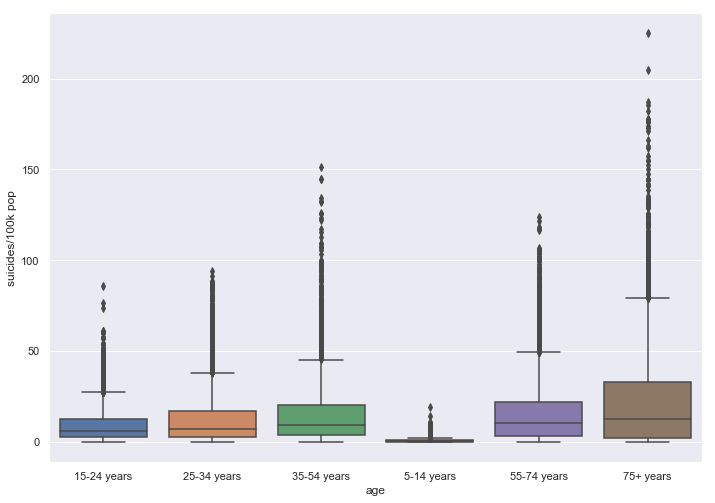

In [57]:
ordered_age = df.sort_values(by='age', ascending=True)
ax = sns.boxplot(x='age', y='suicides/100k pop', data=ordered_age)

# Answer #3: The highest rate belongs to those who are 75+ years of age, while the lowest belongs to those who are 5-14 years of age. Interestingly, the three groups with the highest rates (75+ years, 55-74 years, and 35-54 years) are also those with the highest outliers.

**Further investigation into this question could include:**
* Analyzing whether this trend holds true for each individual country
* Understanding the reasons why individuals in the groups with the highest ratings commit suicide more than those in the groups with lower ratings
* Breaking down the age category further into single numbers (ex. 25 years of age, 26, 27... as opposed to 25-34 years as a discrete category) to more visibly see trends

# Question #4: What impact does the calendar year have on suicide rate?

Let's use a **violin plot** to visualize!

/Users/cherishkim/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


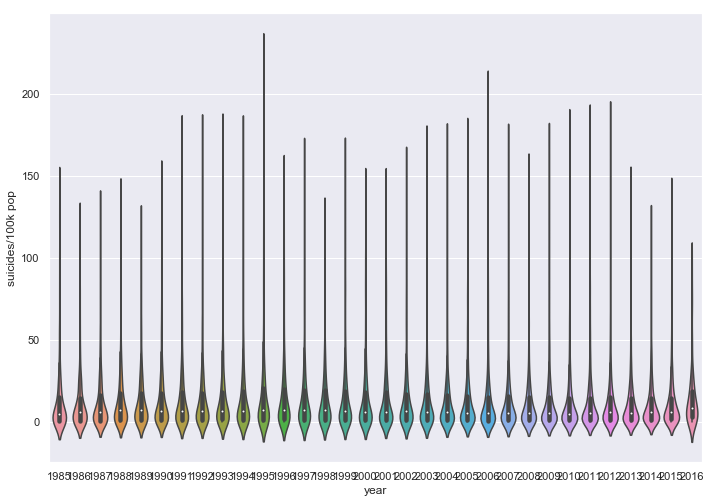

In [65]:
int_year = df
int_year['year'] = int_year['year'].apply(lambda x: np.int64(x))
sns.violinplot(x='year', y='suicides/100k pop', data=df)
plt.show()

# Answer #4: The probability of suicides taking place at younger ages increases around the year 2005. Interestingly, the overall probability of a high suicide rate is low for 2016.

**Further investigation into this question could include:**
* Analysis of what took place in the year 2005 to cause the observable change in probability
* Analysis of what took place in the year 2016 to cause the unusually sharp decrease in probability
* Understanding what caused the tremendous ranges in the years 1995 and 2006

# Question #5: The demographic data of the singer I mentioned in the intro is as follows: male, 25-34 years of age. If we analyze the data points whose sex and age are the same, what trends will we see from year to year?

## First, let's make a dataset that only contains data for those from ages 25-34.

In [10]:
age = df[(df['age'] == '25-34 years')]
age.head()

,country,year,sex,age,suicides/100k pop
4,Albania,1987,male,25-34 years,3.28
7,Albania,1987,female,25-34 years,1.56
19,Albania,1988,female,25-34 years,1.91
20,Albania,1988,male,25-34 years,1.79
25,Albania,1989,male,25-34 years,6.35


## Now let's isolate further by making it males only.

In [11]:
males_only = age[(age['sex'] == 'male')]
males_only.head()

,country,year,sex,age,suicides/100k pop
4,Albania,1987,male,25-34 years,3.28
20,Albania,1988,male,25-34 years,1.79
25,Albania,1989,male,25-34 years,6.35
39,Albania,1992,male,25-34 years,2.85
51,Albania,1993,male,25-34 years,3.91


## Since we're not factoring country into this question, let's drop it; and since all the data points are male and 25-34 years of age, let's drop that column as well.

In [12]:
narrow_df = males_only.drop(columns=['country', 'sex', 'age'])
narrow_df.head()

,year,suicides/100k pop
4,1987,3.28
20,1988,1.79
25,1989,6.35
39,1992,2.85
51,1993,3.91


## Finally, let's use Seaborn's .countplot to visualize.

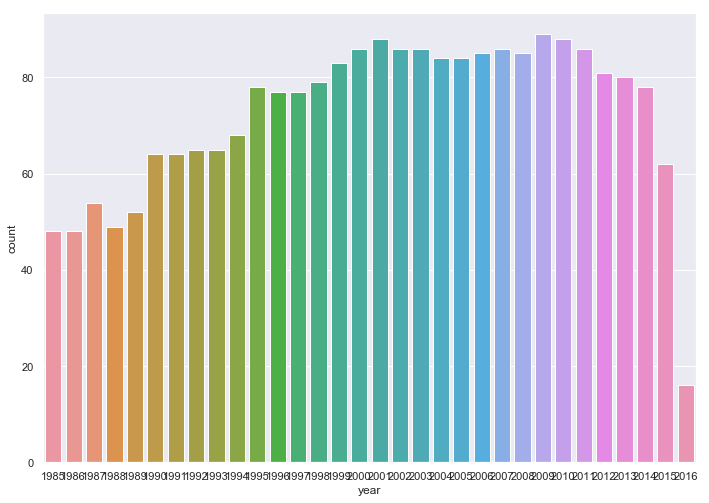

In [13]:
sns.countplot(x='year', data=narrow_df)

# Answer #5: For males aged 25-34 years, the suicide rate showed an overall increase until the year 2009. After that, there was a slight decline, then a sharp decline in years 2015 and 2016.

**Further investigation into this question could include:**
* Analyzing what caused the rate to increase from years 1985 to 2009.
* Analyzing what caused the rate to then decrease.

# In closing, the subject of suicide is difficult to address, but it's important to look at the data so we can understand the trends behind it and try to prevent it as much as we can.

Further analysis of this data could, in my opinion, benefit from the points I discuss under each of the answers, as well as each of the following:
* **Data on South Korea.** I picked this dataset because of how recent its data was and how thorough it was, but I was a bit saddened to see there was no data on South Korean suicides contained in it. Suicide is a major issue in South Korea - many suspect this is because of its intensely competitive culture. The singer whose tragic death evoked my interest in understanding this subject matter, Kim Jonghyun, was South Korean (as am I), and I would have liked to analyze data from our country of origin.
* **Data on any mental illnesses these individuals were struggling with.** The most oft-cited cause of suicide is depression. Any data on what mental illnesses some of these individuals had, especially if they had depression comorbid with other mental illnesses, could potentially yield results that could help mental health providers know who is at highest risk in their countries. This would then lead to a more effective allocation of resources, preventing more suicides as a result.
* **Access to mental health resources.** In many countries, people are uneducated on the subject of mental health and/or access to mental health resources. I suspect that countries with high awareness of mental health and universal accessibility to mental health resources have comparatively lower rates of suicide than the rest of the world. Quantifying awareness and resource accessibility and adding that to the dataset would help determine the extent to which such things are helpful in reducing the number of suicides.